\usepackage{graphicx} % Required for inserting images
\usepackage{amsmath}
\usepackage{ulem}
\title{MAT167}
\author{Yuchen Liu}
\date{August 2023}

\begin{document}

\maketitle

Matrices can be partitioned into several submatrices known as “blocks.” Using a blocked approach,
matrix-matrix multiplication can be performed with a divide and conquer approach. Supposed we have
two matrices,
a) Show that C can be writen as
\begin{equation*}
C=
    \begin{pmatrix}
    M_{1}+M_{4}+M_{5}-M_{7}& M_{3}+M_{5}\\
    M_{2}+M_{4}&M_{1}-M_{2}+M_{3}+M_{6}\\
    \end{pmatrix}
\end{equation*}
Given:
\begin{equation*}
\begin{aligned}
M1 &= (A_{11} + A_{22})(B_{11} + B_{22}) \\
M2 &= (A_{21} + A_{22})B_{11} \\
M3 &= A_{11}(B_{12} - B_{22}) \\
M4 &= A_{22}(B_{21} - B_{11}) \\
M5 &= (A_{11} + A_{12})B_{22} \\
M6 &= (A_{21} - A_{11})(B_{11} + B_{12}) \\
M7 &= (A_{12} - A_{22})(B_{21} + B_{22})
\end{aligned}
\end{equation*}
for the first column and first row\\
$M_{1}+M_{4}+M_{5}-M_{7}=$\\
$A_{11}B_{22}$ + \sout{$A_{22}B_{11}$} + \sout{$A_{22}B_{22}$} - \sout{$A_{22}B_{21}$} - \sout{$A_{22}B_{11}$} + \sout{$A_{11}B_{22}$} + \sout{$A_{12}B_{22}$} + $A_{12}B_{21}$ +\sout{ $B_{22}A_{12}$} - \sout{$A_{22}B_{21}$} - \sout{$A_{22}B_{22}$}
\\$=A_{11}B_{11}+A_{12}B_{21}$\\
for the first column and second row\\
$M3+M5=$\\
$A_{11}B_{12}$ - \sout{$A_{11}B_{22} + A_{11}B_{22}$} +$ A_{12}B_{22}$\\
$=A_{11}B_{12} + A_{12}B_{22}$\\
for the second column and first row\\
$M2+M4=$\\
$A_{21}B_{11}$+\sout{$A_{22}B{11}$}+$A_{22}B_{21}$-\sout{$A_{22}B_{11}$}\\$=A_{21}B_{11}+A_{22}B_{21}$\\
for the second column and second row\\
$M1-M2+M3+M6=$\\
\sout{$A_{11}B_{22}$} + \sout{$A_{22}B_{11}$} + $A_{22}B_{22}$ - \sout{$A_{22}B_{21}$}-\sout{$A_{21}B_{11}$}-\sout{$A_{22}B{11}$}+\sout{$A_{11}B_{12}$} - \sout{$A_{11}B_{22}$}+\sout{$A_{21}B_{11}$}+$A_{21}B_{12}$-\sout{$A_{11}B_{11}$}-\sout{$A_{11}B_{12}$}\\=$A_{21}B_{12}$+$A_{22}B_{22}$\\
So we can have :\\
\begin{equation*}
C=
    \begin{pmatrix}
    A_{11}B_{11}+A_{12}B_{21}& A_{11}B_{12} + A_{12}B_{22}\\
    A_{21}B_{11}+A_{22}B_{21}& A_{21}B_{12}$+$A_{22}B_{22}\\
    \end{pmatrix}
\end{equation*}



(b) Implement this method of blocked matrix multiplication and verify your code works by comparing
it to the results of your programming language’s built-in matrix product routine.


1


2

In [ ]:
import numpy as np

def matrix_multiply(A, B):
    A11, A12 = A[0]
    A21, A22 = A[1]
    B11, B12 = B[0]
    B21, B22 = B[1]

    M1 = (A11 + A22) * (B11 + B22)
    M2 = (A21 + A22) * B11
    M3 = A11 * (B12 - B22)
    M4 = A22 * (B21 - B11)
    M5 = (A11 + A12) * B22
    M6 = (A21 - A11) * (B11 + B12)
    M7 = (A12 - A22) * (B21 + B22)

    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    result = np.array([[C11, C12], [C21, C22]])
    return result

# Test the function with example matrices A and B
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = matrix_multiply(A, B)

print("Matrix A:")
print(A)
print("Matrix B:")
print(B)
print("Resultant Matrix C:")
print(C)
np.dot(A, B)

Matrix A:
[[1 2]
 [3 4]]
Matrix B:
[[5 6]
 [7 8]]
Resultant Matrix C:
[[19 22]
 [43 50]]


array([[19, 22],
       [43, 50]])

 C)Implement this method recursively such that it keeps subdividing the problem until the blocks of
A and B are just scalars

In [ ]:
import numpy as np

def matrix_multiply_recursive(A, B):
    if len(A) == 1:
        return A * B

    n = len(A)
    half_n = n // 2

    A11 = A[:half_n, :half_n]
    A12 = A[:half_n, half_n:]
    A21 = A[half_n:, :half_n]
    A22 = A[half_n:, half_n:]

    B11 = B[:half_n, :half_n]
    B12 = B[:half_n, half_n:]
    B21 = B[half_n:, :half_n]
    B22 = B[half_n:, half_n:]

    M1 = matrix_multiply_recursive(A11 + A22, B11 + B22)
    M2 = matrix_multiply_recursive(A21 + A22, B11)
    M3 = matrix_multiply_recursive(A11, B12 - B22)
    M4 = matrix_multiply_recursive(A22, B21 - B11)
    M5 = matrix_multiply_recursive(A11 + A12, B22)
    M6 = matrix_multiply_recursive(A21 - A11, B11 + B12)
    M7 = matrix_multiply_recursive(A12 - A22, B21 + B22)

    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
    return C

# Test the function with example matrices A and B
A = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
B = np.array([[16, 15, 14, 13], [12, 11, 10, 9], [8, 7, 6, 5], [4, 3, 2, 1]])
C = matrix_multiply_recursive(A, B)

print("Matrix A:")
print(A)
print("Matrix B:")
print(B)
print("Resultant Matrix C:")
print(C)
# Perform matrix multiplication using NumPy's built-in function for comparison
C_numpy = np.dot(A, B)
print(C_numpy)
# Check if the results are close
print("Are the results equal?", np.allclose(C, C_numpy))

Matrix A:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
Matrix B:
[[16 15 14 13]
 [12 11 10  9]
 [ 8  7  6  5]
 [ 4  3  2  1]]
Resultant Matrix C:
[[ 80  70  60  50]
 [240 214 188 162]
 [400 358 316 274]
 [560 502 444 386]]
[[ 80  70  60  50]
 [240 214 188 162]
 [400 358 316 274]
 [560 502 444 386]]
Are the results equal? True


In [ ]:
# Generate random 64x64 matrices A and B
A = np.random.randint(1, 10, (64, 64))
B = np.random.randint(1, 10, (64, 64))

# Perform matrix multiplication using the recursive function
C_recursive = matrix_multiply_recursive(A, B)

# Perform matrix multiplication using NumPy's built-in function for comparison
C_numpy = np.dot(A, B)

# Check if the results are close
print("Are the results equal?", np.allclose(C_recursive, C_numpy))

Are the results equal? True


D)Numerically compare the asymptotic work for this method and naive matrix multiplication. Here
is an exmaple code snippet of very naive matrix multiplication

In [ ]:
import numpy as np

def matrix_multiply_naive(A, B):
    if A.shape[1] != B.shape[0]:
        raise ValueError("Number of columns in matrix A must be equal")

    result = np.zeros((A.shape[0], B.shape[1]))

    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                result[i, j] += A[i, k] * B[k, j]

    return result


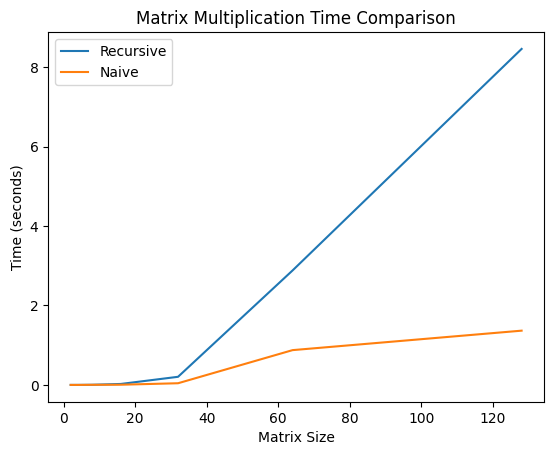

In [ ]:
import time
import matplotlib.pyplot as plt
# Compare execution times for different matrix sizes
sizes = [2, 4, 8, 16, 32, 64, 128]
recursive_times = []
naive_times = []

for size in sizes:
    A = np.random.rand(size, size)
    B = np.random.rand(size, size)

    start_time = time.time()
    matrix_multiply_recursive(A, B)
    end_time = time.time()
    recursive_times.append(end_time - start_time)

    start_time = time.time()
    matrix_multiply_naive(A, B)
    end_time = time.time()
    naive_times.append(end_time - start_time)

# Plot the results
plt.plot(sizes, recursive_times, label='Recursive')
plt.plot(sizes, naive_times, label='Naive')
plt.xlabel('Matrix Size')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Time Comparison')
plt.legend()
plt.show()